# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | khani
Processing Record 5 of Set 1 | port-gentil
Processing Record 6 of Set 1 | muros
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | sao felix do xingu
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | amuntai
Processing Record 15 of Set 1 | chicama
Processing Record 16 of Set 1 | neryungri
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | karpogory
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | kodiak
Processing Rec

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,290.90,95,97,6.19,ZA,1667497062
1,castro,-24.7911,-50.0119,291.42,49,51,2.64,BR,1667497063
2,khani,41.9563,42.9566,278.91,92,99,0.39,GE,1667497063
3,port-gentil,-0.7193,8.7815,300.13,83,40,5.14,GA,1667497063
4,muros,42.7762,-9.0603,288.20,73,44,2.58,ES,1667496887


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

def K_to_C(x):
    return x-273.15
city_data_df["Max Temp"] = city_data_df["Max Temp"].apply(K_to_C)

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,17.75,95,97,6.19,ZA,1667497062
1,castro,-24.7911,-50.0119,18.27,49,51,2.64,BR,1667497063
2,khani,41.9563,42.9566,5.76,92,99,0.39,GE,1667497063
3,port-gentil,-0.7193,8.7815,26.98,83,40,5.14,GA,1667497063
4,muros,42.7762,-9.0603,15.05,73,44,2.58,ES,1667496887


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

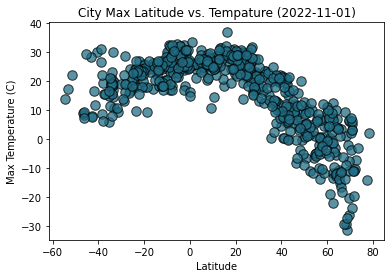

<Figure size 432x288 with 0 Axes>

In [14]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')



# Incorporate the other graph properties
plt.title('City Max Latitude vs. Tempature (2022-11-01)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

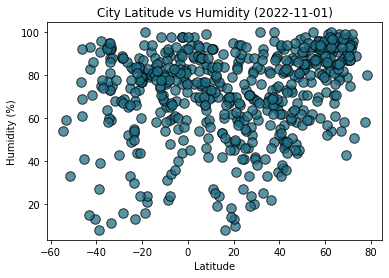

<Figure size 432x288 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (2022-11-01)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

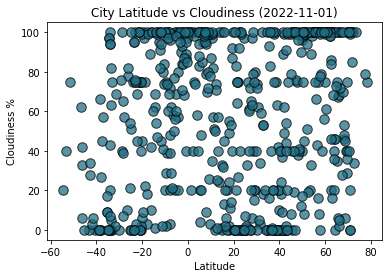

<Figure size 432x288 with 0 Axes>

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (2022-11-01)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

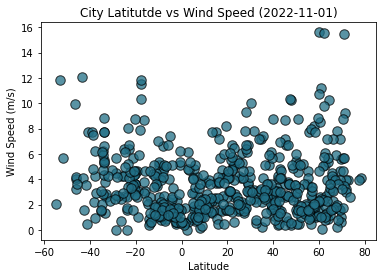

<Figure size 432x288 with 0 Axes>

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitutde vs Wind Speed (2022-11-01)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Linear regression plots demonstrated below

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,khani,41.9563,42.9566,5.76,92,99,0.39,GE,1667497063
4,muros,42.7762,-9.0603,15.05,73,44,2.58,ES,1667496887
8,tuktoyaktuk,69.4541,-133.0374,-11.00,79,100,4.63,CA,1667497065
13,neryungri,56.6709,124.6491,-14.00,96,100,0.48,RU,1667497067
14,nanortalik,60.1432,-45.2371,4.15,72,100,15.60,GL,1667497068


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,17.75,95,97,6.19,ZA,1667497062
1,castro,-24.7911,-50.0119,18.27,49,51,2.64,BR,1667497063
3,port-gentil,-0.7193,8.7815,26.98,83,40,5.14,GA,1667497063
5,busselton,-33.6500,115.3333,14.32,92,82,3.77,AU,1667497064
6,sao felix do xingu,-6.6447,-51.9950,29.53,60,58,0.90,BR,1667497035


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7297236685626095


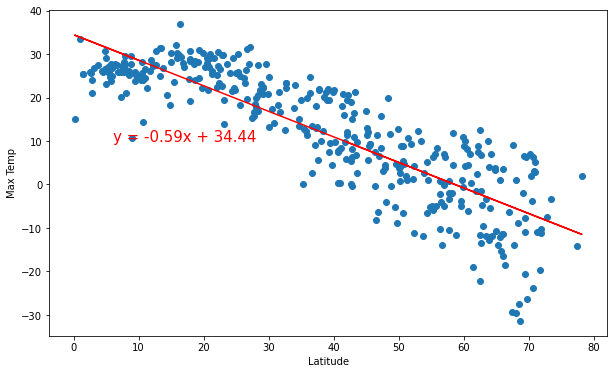

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()


R squared: 0.3383094534139835


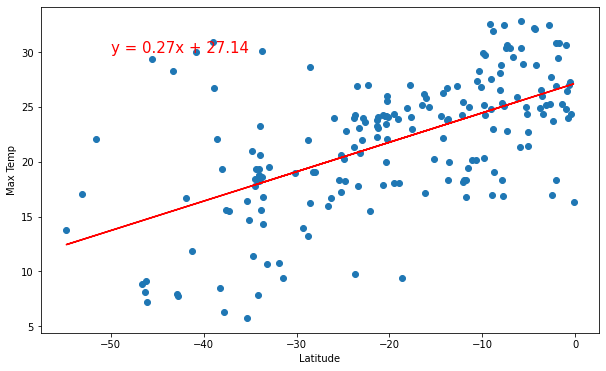

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(-50,30),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.09363618284347285


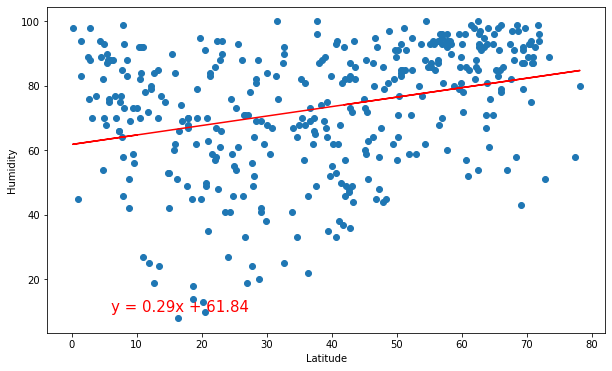

In [23]:
# Northern Hemisphere
# Linear regression on Southern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

R squared: 0.02106905394011889


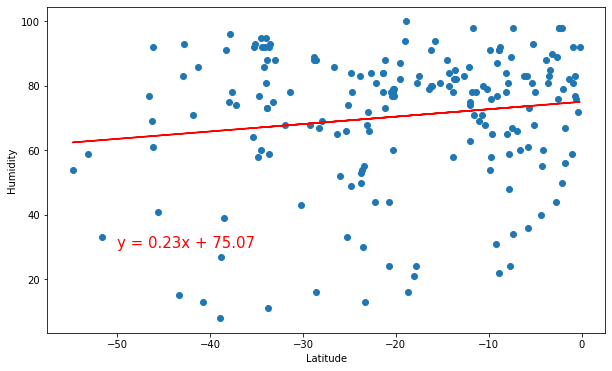

In [24]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.014431970930843474


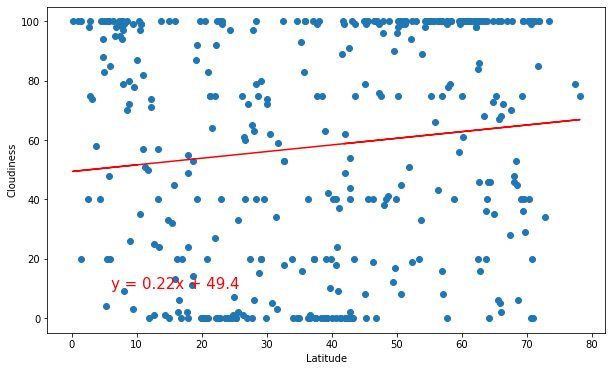

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

R squared: 0.2147241278702927


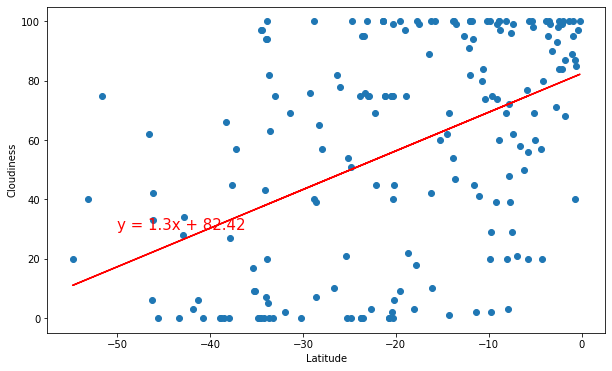

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.031663381706566664


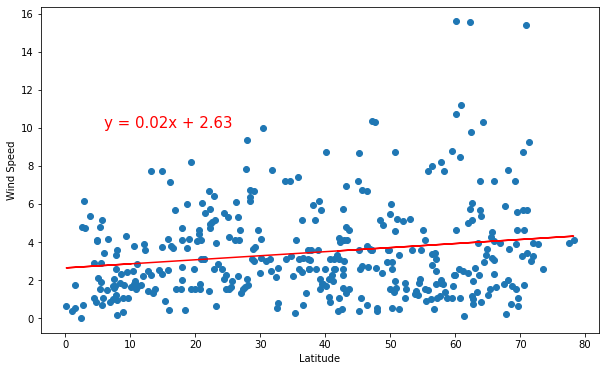

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

R squared: 0.12250602648661882


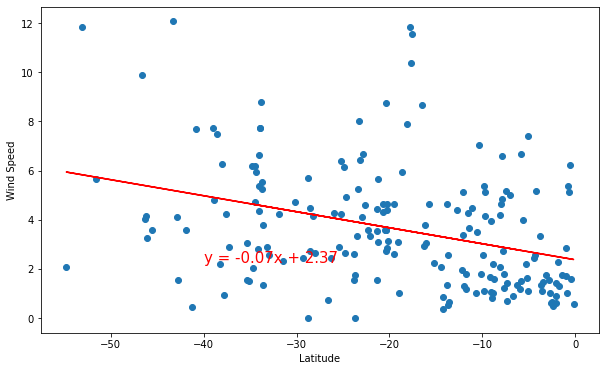

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,2.25),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE